In [1]:
import msprime, pyslim
import tskit
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import itertools
import math
import pandas as pd

In [25]:
labels = pd.read_csv("flat_maps_data/labels.csv", names = ["path", "N"])
print(labels)

                                     path    N
0       spatial_kin/spatial_sim_5.0_0.csv  292
1       spatial_kin/spatial_sim_5.0_1.csv  212
2       spatial_kin/spatial_sim_5.0_2.csv  234
3       spatial_kin/spatial_sim_5.0_3.csv  235
4       spatial_kin/spatial_sim_5.0_4.csv  277
...                                   ...  ...
1995  spatial_kin/spatial_sim_9.75_95.csv  778
1996  spatial_kin/spatial_sim_9.75_96.csv  738
1997  spatial_kin/spatial_sim_9.75_97.csv  781
1998  spatial_kin/spatial_sim_9.75_98.csv  737
1999  spatial_kin/spatial_sim_9.75_99.csv  712

[2000 rows x 2 columns]


In [26]:
kin_matrix = np.array(pd.read_csv("flat_maps_data/spatial_kin/spatial_sim_5.0_0.csv"))
nhs =  sum(kin_matrix[:,0])
print(nhs)


1.0


In [27]:
distances = np.sqrt((kin_matrix[:,2] - kin_matrix[:,4])**2 + (kin_matrix[:,3] - kin_matrix[:,5])**2)
print(len(distances))
hs_dist = distances[np.where(kin_matrix[:,0] == 1)]

435


In [28]:
paths = np.array(labels)[:,0]
Ns = np.array(labels)[:,1]
n_hs = np.empty(len(paths))
n_sibs = np.empty(len(paths))
hs_dist = np.empty(len(paths))
for i, path in enumerate(paths):
    kin_matrix = np.array(pd.read_csv("flat_maps_data/" + path))
    n_hs[i] = sum(kin_matrix[:,0])
    n_sibs[i] = sum(kin_matrix[:,1])
    distances = np.sqrt((kin_matrix[:,2] - kin_matrix[:,4])**2 + (kin_matrix[:,3] - kin_matrix[:,5])**2)
    if n_hs[i] != 0:
        hs_dist[i] = np.mean(distances[np.where(kin_matrix[:,0] == 1)])

In [33]:
print(np.mean(hs_dist))

-1.6937088071290832e+183


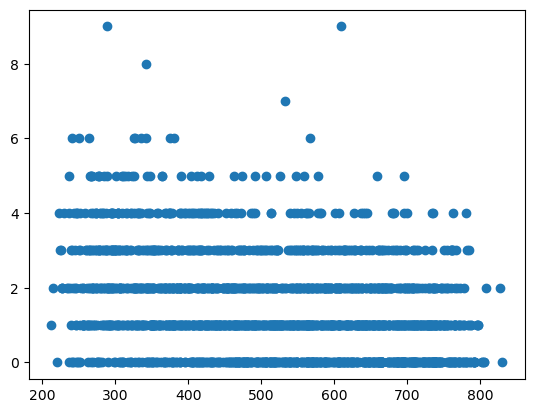

In [29]:
plt.scatter(Ns, n_hs)

(array([512., 662., 432., 233., 111.,  36.,  10.,   1.,   1.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

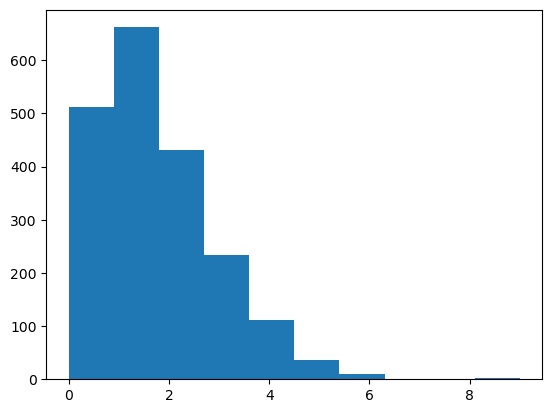

In [35]:
plt.hist(n_hs)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.999e+03]),
 array([-3.38741761e+186, -3.04867585e+186, -2.70993409e+186,
        -2.37119233e+186, -2.03245057e+186, -1.69370881e+186,
        -1.35496705e+186, -1.01622528e+186, -6.77483523e+185,
        -3.38741761e+185,  2.07636332e+001]),
 <BarContainer object of 10 artists>)

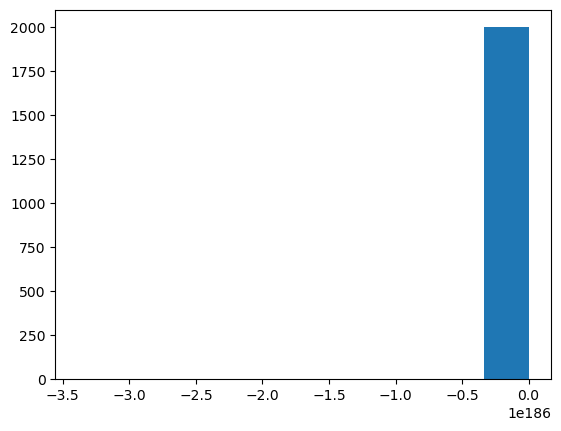

In [36]:
plt.hist(hs_dist)

In [2]:
labels = pd.read_csv("spatial_sim_data/labels.csv", names = ["path", "N"])
print(labels)

                                              path     N
0     input_matrices/spatial_sim_parents_500_0.csv   531
1     input_matrices/spatial_sim_parents_500_1.csv   525
2     input_matrices/spatial_sim_parents_500_2.csv   532
3     input_matrices/spatial_sim_parents_500_3.csv   539
4     input_matrices/spatial_sim_parents_500_4.csv   528
...                                            ...   ...
4995  input_matrices/spatial_sim_parents_999_5.csv  1104
4996  input_matrices/spatial_sim_parents_999_6.csv  1100
4997  input_matrices/spatial_sim_parents_999_7.csv  1113
4998  input_matrices/spatial_sim_parents_999_8.csv  1136
4999  input_matrices/spatial_sim_parents_999_9.csv  1113

[5000 rows x 2 columns]


In [8]:
kin_matrix = np.array(pd.read_csv("spatial_sim_data/input_matrices/spatial_sim_parents_500_0.csv"))
po =  sum(kin_matrix[:,0]) + sum(kin_matrix[:,1])
print(po)


26.0


In [9]:
paths = np.array(labels)[:,0]
Ns = np.array(labels)[:,1]
n_po = np.empty(len(paths))
for i, path in enumerate(paths):
    kin_matrix = np.array(pd.read_csv("spatial_sim_data/" + path))
    n_po[i] = sum(kin_matrix[:,0]) + sum(kin_matrix[:,1])

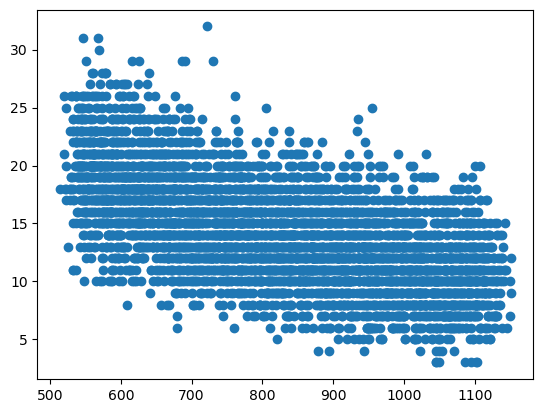

In [11]:
plt.scatter(Ns, n_po)